# Carga y Exploración de Datos:


In [1]:
import pandas as pd

In [2]:
# prompt: leer un data set de extension parquet alamcenado en google drive
df = pd.read_parquet('/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/vehicles.parquet')
print(df.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ...  size  type paint_color  \
0         None  None      None      None  ...  None  No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,az,NaN,NaN,None
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ar,NaN,NaN,None
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,fl,NaN,NaN,None
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ma,NaN,NaN,None
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,None,None,None,None,...,None,None,None,None,None,NaN,nc,NaN,NaN,None
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ny,NaN,NaN,None
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ny,NaN,NaN,None
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ny,NaN,NaN,None
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,or,NaN,NaN,None
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,pa,NaN,NaN,None


# Limpieza y Preprocesamiento:

VIN es el numero de matricula de los autos, asi que usaremos esta información para filtrar la mayor cantidad de duplicados del DataSeT y quedarnos solamente con un auto por cada publicación.

In [5]:
# Encuentra filas duplicadas basadas en la columna 'VIN'
duplicated_vins = df[df.duplicated('VIN', keep=False)]
# Si hay duplicados, reorganiza las columnas para poner 'VIN' al principio
if not duplicated_vins.empty:
  cols = ['VIN'] + [col for col in duplicated_vins.columns if col != 'VIN']
  duplicated_vins = duplicated_vins[cols]
  # Muestra las filas duplicadas con 'VIN' primero
  print(duplicated_vins)
else:
  print("No hay valores duplicados en la columna 'VIN'.")

                      VIN          id  \
0                    None  7222695916   
1                    None  7218891961   
2                    None  7221797935   
3                    None  7222270760   
4                    None  7210384030   
...                   ...         ...   
426875  1N4AA6AV6KC367801  7301591192   
426876  7JR102FKXLG042696  7301591187   
426877  1GYFZFR46LF088296  7301591147   
426878  58ABK1GG4JU103853  7301591140   
426879  WBA4J1C58KBM14708  7301591129   

                                                      url  \
0       https://prescott.craigslist.org/cto/d/prescott...   
1       https://fayar.craigslist.org/ctd/d/bentonville...   
2       https://keys.craigslist.org/cto/d/summerland-k...   
3       https://worcester.craigslist.org/cto/d/west-br...   
4       https://greensboro.craigslist.org/cto/d/trinit...   
...                                                   ...   
426875  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  https://wyo

In [6]:
filas_vin = df[df['VIN'] == '1N4AA6AV6KC367801']
filas_vin

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
60481,7301595567,https://santamaria.craigslist.org/ctd/d/atlant...,santa maria,https://santamaria.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,None,sedan,None,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,ca,33.78650,-84.44540,2021-04-04T03:30:43-0700
66450,7305521691,https://stockton.craigslist.org/ctd/d/atlanta-...,stockton,https://stockton.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,None,sedan,None,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,ca,33.78650,-84.44540,2021-04-12T03:30:30-0700
72473,7301677599,https://boulder.craigslist.org/ctd/d/boulder-2...,boulder,https://boulder.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,None,sedan,None,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,co,40.02104,-105.26465,2021-04-04T10:00:57-0600
75372,7301733215,https://cosprings.craigslist.org/ctd/d/colorad...,colorado springs,https://cosprings.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,None,sedan,None,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,co,38.82108,-104.82311,2021-04-04T12:11:34-0600
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,None,sedan,None,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.78650,-84.44540,2021-04-04T03:21:31-0600


Como se ve en el ejemplo anterior por un auto pueden haber mas de 5 publicaciones distintas. Por lo tanto nos quedaremos con la publicación mas actual y su precio actualizado y eliminaremos los duplicados.

In [7]:
# Mantener solo la publicación más reciente por VIN
df = df.sort_values('posting_date').drop_duplicates(subset='VIN', keep='last')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118265 entries, 419122 to 410619
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            118265 non-null  int64  
 1   url           118265 non-null  object 
 2   region        118265 non-null  object 
 3   region_url    118265 non-null  object 
 4   price         118265 non-null  int64  
 5   year          117671 non-null  float64
 6   manufacturer  115199 non-null  object 
 7   model         117560 non-null  object 
 8   condition     61132 non-null   object 
 9   cylinders     70212 non-null   object 
 10  fuel          116627 non-null  object 
 11  odometer      116669 non-null  float64
 12  title_status  114625 non-null  object 
 13  transmission  117028 non-null  object 
 14  VIN           118264 non-null  object 
 15  drive         90939 non-null   object 
 16  size          30341 non-null   object 
 17  type          102041 non-null  object 
 18  pain

In [9]:
#Muestra columna price = 0
df[df['price'] == 0]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
48418,7301632492,https://redding.craigslist.org/ctd/d/redding-2...,redding,https://redding.craigslist.org,0,2017.0,ford,super duty f-350 srw,None,8 cylinders,...,None,truck,None,https://images.craigslist.org/00q0q_5JOZFcCZMJ...,Park Marina Motors STOCK #: 24804 ...,NaN,ca,40.572340,-122.376119,2021-04-04T06:59:57-0700
108029,7301605520,https://pensacola.craigslist.org/ctd/d/pensaco...,pensacola,https://pensacola.craigslist.org,0,2020.0,lincoln,nautilus reserve automatic,None,None,...,None,SUV,white,https://images.craigslist.org/00c0c_xKpFfVqo2P...,2020 LINCOLN Nautilus Reserve Astro Lincoln87...,NaN,fl,30.481230,-87.251890,2021-04-04T07:01:07-0500
108027,7301605525,https://pensacola.craigslist.org/ctd/d/pensaco...,pensacola,https://pensacola.craigslist.org,0,2020.0,ford,f-150 lariat 4wd supercrew automatic,None,None,...,None,pickup,white,https://images.craigslist.org/00N0N_8SxAdmSMJp...,2020 Ford F-150 Lariat 4WD SuperCrew Astro Li...,NaN,fl,30.481230,-87.251890,2021-04-04T07:01:09-0500
108028,7301605555,https://pensacola.craigslist.org/ctd/d/pensaco...,pensacola,https://pensacola.craigslist.org,0,2019.0,lincoln,continental reserve automatic,None,None,...,None,sedan,blue,https://images.craigslist.org/00h0h_atNw8nLlPR...,2019 LINCOLN Continental Reserve Astro Lincol...,NaN,fl,30.481230,-87.251890,2021-04-04T07:01:17-0500
108026,7301605560,https://pensacola.craigslist.org/ctd/d/pensaco...,pensacola,https://pensacola.craigslist.org,0,2007.0,chevrolet,corvette,None,None,...,None,coupe,red,https://images.craigslist.org/00Q0Q_lsTvaWQfn2...,Still available as of 2021-04-10 2007 Chevrol...,NaN,fl,30.481230,-87.251890,2021-04-04T07:01:20-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253138,7317026953,https://newjersey.craigslist.org/ctd/d/paterso...,north jersey,https://newjersey.craigslist.org,0,2013.0,bmw,535i,None,None,...,None,sedan,blue,https://images.craigslist.org/00v0v_lMmV6Dfnss...,2013 BMW 5 Series 4dr Sdn 535i xDrive AWD ...,NaN,nj,40.924076,-74.142895,2021-05-04T20:01:46-0400
274732,7317030950,https://newyork.craigslist.org/brk/ctd/d/pater...,new york city,https://newyork.craigslist.org,0,2017.0,porsche,macan,None,None,...,None,other,white,https://images.craigslist.org/00Z0Z_9hsCMTbc4W...,2017 Porsche Macan AWD Offered by: Adams A...,NaN,ny,40.924076,-74.142895,2021-05-04T20:11:08-0400
256107,7317034828,https://southjersey.craigslist.org/ctd/d/littl...,south jersey,https://southjersey.craigslist.org,0,2015.0,ram,1500,None,None,...,None,pickup,None,https://images.craigslist.org/00m0m_bqZvdaLj4R...,2015 Ram 1500 4WD Crew Cab 140.5' Laramie ...,NaN,nj,40.854584,-74.042702,2021-05-04T20:21:05-0400
332449,7317034834,https://philadelphia.craigslist.org/ctd/d/pate...,philadelphia,https://philadelphia.craigslist.org,0,2017.0,hyundai,tucson,None,None,...,None,wagon,None,https://images.craigslist.org/00r0r_3yOx7Xr1JG...,2017 Hyundai Tucson Value AWD Offered by: ...,NaN,pa,40.924076,-74.142895,2021-05-04T20:21:07-0400


Eliminamos filas con precio de auto = '0'

In [10]:
df = df.drop(df[df['price'] == 0].index)

Una vez usado el VIN ya no es relevante esta columna asi que será dropeada junto a otras columnas con información irrelevante para el modelo.

In [12]:
columnas_a_eliminar = ['id', 'url', 'region_url', 'image_url', 'VIN', 'county','long','lat','paint_color', 'state', 'posting_date','region', 'model', 'condition','cylinders','drive','size','description','type' ]
df = df.drop(columns=columnas_a_eliminar)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105649 entries, 419122 to 410619
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         105649 non-null  int64  
 1   year          105067 non-null  float64
 2   manufacturer  102743 non-null  object 
 3   fuel          104287 non-null  object 
 4   odometer      104937 non-null  float64
 5   title_status  102368 non-null  object 
 6   transmission  104748 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.4+ MB


In [14]:
df.isna().sum()

,0
price,0
year,582
manufacturer,2906
fuel,1362
odometer,712
title_status,3281
transmission,901


Imputamos datos en columnas relevantes

In [15]:
df['manufacturer'] = df['manufacturer'].fillna('unknown')

In [16]:
# Rellenar año con la mediana
df['year'] = df.groupby('manufacturer')['year'].transform(lambda x: x.fillna(x.median()))


In [17]:
df['fuel'] = df.groupby('manufacturer')['fuel'].transform(lambda x: x.fillna(x.mode()[0]))


In [18]:
moda_global = df['odometer'].mode()[0]
df['odometer'] = (
    df.groupby(['year', 'manufacturer'])['odometer']
    .transform(lambda x: x.fillna(x.median()))
    .fillna(moda_global))

In [19]:
df['transmission'] = df.groupby(['manufacturer', 'fuel'])['transmission'].transform(lambda x: x.fillna(x.mode()[0]))



In [20]:
df['title_status'] = df.groupby(['manufacturer', 'year'])['title_status'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'clean'
)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105649 entries, 419122 to 410619
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         105649 non-null  int64  
 1   year          105649 non-null  float64
 2   manufacturer  105649 non-null  object 
 3   fuel          105649 non-null  object 
 4   odometer      105649 non-null  float64
 5   title_status  105649 non-null  object 
 6   transmission  105649 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.4+ MB


Revisamos outliers

In [22]:
df.describe(include='all')

,price,year,manufacturer,fuel,odometer,title_status,transmission
count,1.056490e+05,105649.000000,105649,105649,1.056490e+05,105649,105649
unique,NaN,NaN,42,5,NaN,6,3
top,NaN,NaN,ford,gas,NaN,clean,automatic
freq,NaN,NaN,16677,91940,NaN,103411,90875
mean,2.009257e+04,2012.377202,NaN,NaN,9.222064e+04,NaN,NaN
std,3.825955e+05,6.977665,NaN,NaN,9.973465e+04,NaN,NaN
min,1.000000e+00,1900.000000,NaN,NaN,0.000000e+00,NaN,NaN
25%,8.190000e+03,2010.000000,NaN,NaN,4.188600e+04,NaN,NaN
50%,1.499700e+04,2014.000000,NaN,NaN,8.716800e+04,NaN,NaN
75%,2.521300e+04,2017.000000,NaN,NaN,1.290000e+05,NaN,NaN


Notamos valores excesivos, aplicamos filtros.

In [26]:
numeric_vars = ['price', 'year', 'odometer']  # Variables numéricas
categorical_vars = ['manufacturer', 'fuel', 'title_status', 'transmission']  # Variables categóricas
target_var = 'price'  # Variable objetivo

In [27]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Identificar variables
numeric_vars = ['price', 'year', 'odometer']
categorical_vars = ['manufacturer', 'fuel', 'title_status', 'transmission']
target_var = 'price'

# Función de preprocesamiento CORREGIDA
def preprocess_data(df):
    # 1. Tratamiento de outliers
    for var in numeric_vars:
        q1 = df[var].quantile(0.05)
        q3 = df[var].quantile(0.95)
        df[var] = df[var].clip(q1, q3)

    # 2. Creación de variables derivadas (CORRECCIÓN DEL ERROR)
    current_year = datetime.now().year  # Usamos datetime.now() en lugar de pd.Timestamp
    df['vehicle_age'] = current_year - df['year']
    df['miles_per_year'] = df['odometer'] / df['vehicle_age'].replace(0, 1)  # Evitar división por cero

    # 3. Limpieza de datos
    df = df[(df['year'] >= 1950) & (df['year'] <= current_year)]
    df = df.drop_duplicates()

    return df

# Aplicar preprocesamiento
df_processed = preprocess_data(df.copy())

# Actualizar variables numéricas
numeric_vars += ['vehicle_age', 'miles_per_year']

In [28]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103267 entries, 419122 to 410619
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   price           103267 non-null  float64
 1   year            103267 non-null  float64
 2   manufacturer    103267 non-null  object 
 3   fuel            103267 non-null  object 
 4   odometer        103267 non-null  float64
 5   title_status    103267 non-null  object 
 6   transmission    103267 non-null  object 
 7   vehicle_age     103267 non-null  float64
 8   miles_per_year  103267 non-null  float64
dtypes: float64(5), object(4)
memory usage: 7.9+ MB


In [29]:
df_processed.describe(include='all')

,price,year,manufacturer,fuel,odometer,title_status,transmission,vehicle_age,miles_per_year
count,103267.000000,103267.000000,103267,103267,103267.000000,103267,103267,103267.000000,103267.000000
unique,NaN,NaN,42,5,NaN,6,3,NaN,NaN
top,NaN,NaN,ford,gas,NaN,clean,automatic,NaN,NaN
freq,NaN,NaN,16269,89866,NaN,101040,88807,NaN,NaN
mean,17918.832351,2012.777780,NaN,NaN,89882.478368,NaN,NaN,12.222220,7251.132139
std,11893.910330,4.866323,NaN,NaN,52878.203897,NaN,NaN,4.866323,3568.614749
min,2498.400000,2002.000000,NaN,NaN,9331.400000,NaN,NaN,6.000000,405.713043
25%,8488.000000,2010.000000,NaN,NaN,43447.000000,NaN,NaN,8.000000,4644.969444
50%,14995.000000,2014.000000,NaN,NaN,87854.000000,NaN,NaN,11.000000,7150.857143
75%,24995.000000,2017.000000,NaN,NaN,128632.500000,NaN,NaN,15.000000,9462.055556


A partir de ahora trabajaremos con df_processed

## Visualizaciones

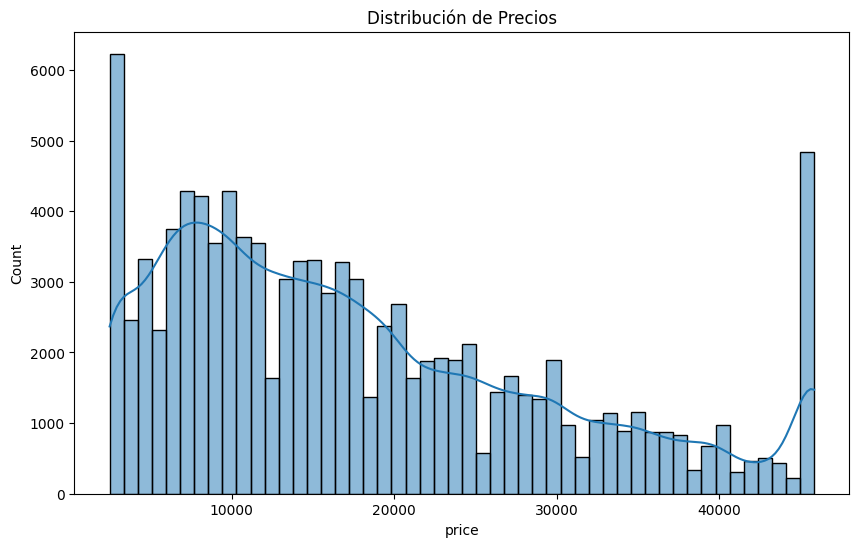

In [36]:
#Visualizaciones Univariadas
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['price'], kde=True, bins=50)
plt.title("Distribución de Precios")
plt.show()

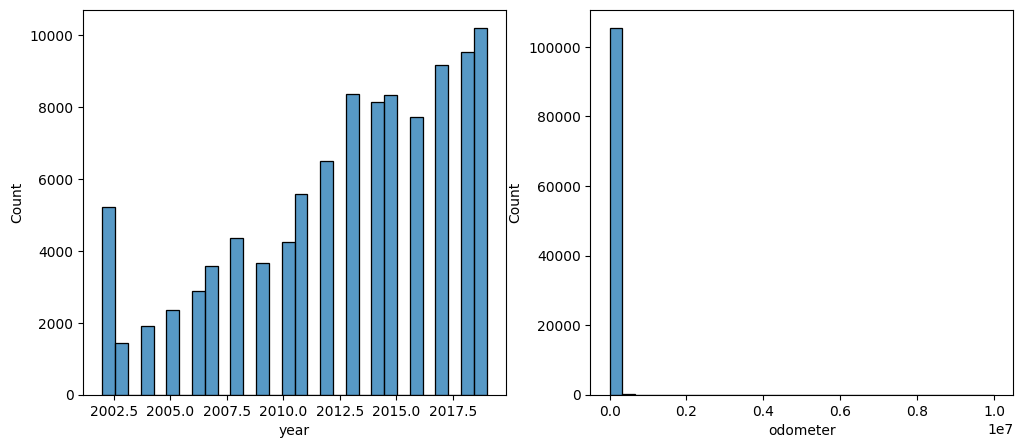

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_processed['year'], bins=30, ax=axes[0])
sns.histplot(df['odometer'], bins=30, ax=axes[1])
plt.show()

 La mayoría de los vehículos están concentrados entre 2010-2020 (autos relativamente recientes).

Pocos vehículos anteriores a 1990, lo que sugiere que son autos clásicos o datos atípicos.

La mayoría de los vehículos tienen menos de 150,000 km/millas.

## Visualizaciones multivariadas

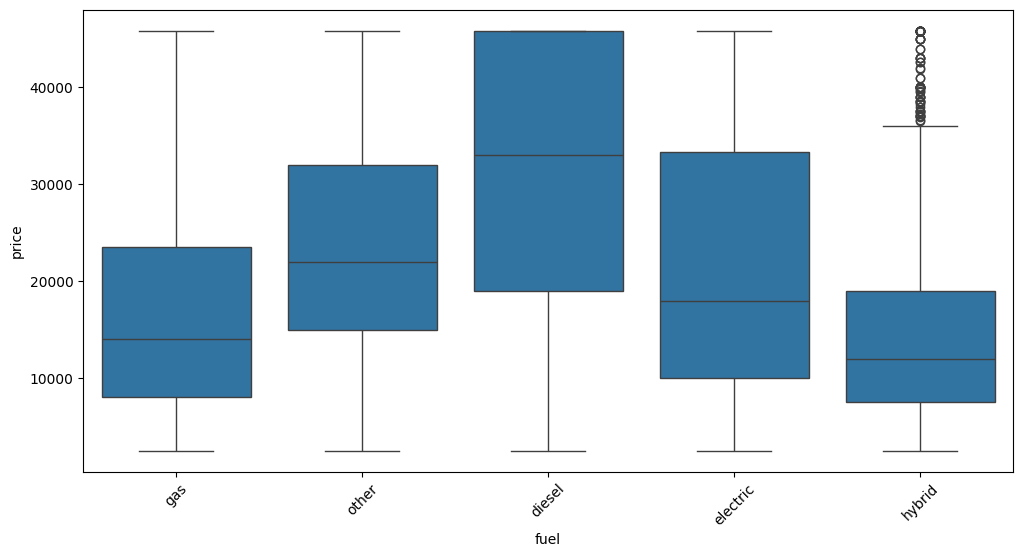

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df_processed['fuel'], y=df_processed['price'])
plt.xticks(rotation=45)
plt.show()

Los vehículos eléctricos/híbridos tienen una distribución sesgada a la derecha, indicando que son generalmente más caros que los de combustión tradicional.

# Preprocesamiento de Datos


In [39]:
target_var = 'price'
features = df_processed.drop(target_var, axis=1)
target = df_processed[target_var]

# División train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identificar automáticamente tipos de columnas
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Transformer para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformer para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [38]:
from sklearn.compose import ColumnTransformer

# Crear el preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


## Entrenamiento

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definición de modelos a evaluar
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Diccionario para almacenar resultados
results = {}

# Entrenamiento y evaluación de cada modelo
for name, model in models.items():
    print(f"\nEntrenando {name}...")

    # Crear pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Entrenamiento
    pipeline.fit(X_train, y_train)

    # Evaluación
    predictions = pipeline.predict(X_test)

    # Calcular métricas
    results[name] = {
        'MAE': mean_absolute_error(y_test, predictions),
        'R2': r2_score(y_test, predictions),
        'Train_Score': pipeline.score(X_train, y_train),
        'Test_Score': pipeline.score(X_test, y_test)
    }

    print(f"{name} entrenado exitosamente")

# Mostrar resultados comparativos
results_df = pd.DataFrame(results).T
results_df.style.format({
    'MAE': '${:,.2f}',
    'RMSE': '${:,.2f}',
    'R2': '{:.4f}',
    'Train_Score': '{:.2%}',
    'Test_Score': '{:.2%}'
})


Entrenando LinearRegression...
LinearRegression entrenado exitosamente

Entrenando RandomForest...
RandomForest entrenado exitosamente

Entrenando GradientBoosting...
GradientBoosting entrenado exitosamente

Entrenando XGBoost...
XGBoost entrenado exitosamente


,MAE,R2,Train_Score,Test_Score
LinearRegression,"$6,065.89",0.5192,52.23%,51.92%
RandomForest,"$6,038.22",0.4702,90.67%,47.02%
GradientBoosting,"$5,859.96",0.5401,54.52%,54.01%
XGBoost,"$5,443.63",0.5774,61.86%,57.74%


# Probamos mejora con GridSearch


In [34]:
from sklearn.model_selection import GridSearchCV

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
xgb_preds = best_xgb.predict(X_test)
print(f"Mejor MAE después de optimización: ${mean_absolute_error(y_test, xgb_preds):,.2f}")

Mejor MAE después de optimización: $5,422.79


# Conclusiones

Los gráficos muestran distribuciones clave de los datos: la mayoría de los vehículos son recientes (2005-2015), con precios concentrados entre $10,000 y $40,000, aunque algunos alcanzan valores atípicos superiores. El gráfico de diámetro (1e7) sugiere una posible normalización o error en los datos, lo que podría afectar el modelado. Los resultados de los modelos indican que XGBoost es el mejor predictor (MAE: $5,443.63, R²: 0.577), seguido de Gradient Boosting, ambos con bajo sobreajuste. RandomForest, aunque preciso en entrenamiento (90.67%), sufre alto sobreajuste (47.02% en test), mientras que LinearRegression ofrece un rendimiento estable pero limitado.